# **Montando uma carteira de investientos**

###  1. Bibliotecas
###  2. Escolhendo e analise dos ativos
###  3. Montando a carteira
###  4. Retornos

## 1. Importando as Bibliotecas

In [101]:
import yfinance as yf
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt

## 2. Escolhendo os ativos

In [102]:
snp_ticker = '^GSPC'
stox_ticker = '^STOXX'
ibov_ticker = '^BVSP'
dolbrl_ticker = 'BRL=X'
eurbrl_ticker = 'EURBRL=X'

### 2.1 Escolhendo o período da análise

In [103]:
inicio = '2013-01-03'
fim = '2023-09-29'

### 2.2 Importando os dados

In [104]:
dados_snp = yf.download(snp_ticker, start = inicio, end = fim, progress=False)['Adj Close']
dados_snp = pd.DataFrame(dados_snp).rename(columns={'Adj Close' : 'S&P 500'})

dados_stox = yf.download(stox_ticker, start = inicio, end = fim, progress=False)['Adj Close']
dados_stox = pd.DataFrame(dados_stox).rename(columns={'Adj Close' : 'STOXX 600'})

dados_ibov = yf.download(ibov_ticker, start = inicio, end = fim, progress=False)['Adj Close']
dados_ibov = pd.DataFrame(dados_ibov).rename(columns={'Adj Close' : 'IBOVESPA'})

dados_dol = yf.download(dolbrl_ticker, start = inicio, end = fim, progress=False)['Adj Close']
dados_dol = pd.DataFrame(dados_dol).rename(columns={'Adj Close' : 'DOL/BRL'})

dados_eur = yf.download(eurbrl_ticker, start = inicio, end = fim, progress=False)['Adj Close']
dados_eur = pd.DataFrame(dados_eur).rename(columns={'Adj Close' : 'EUR/BRL'})

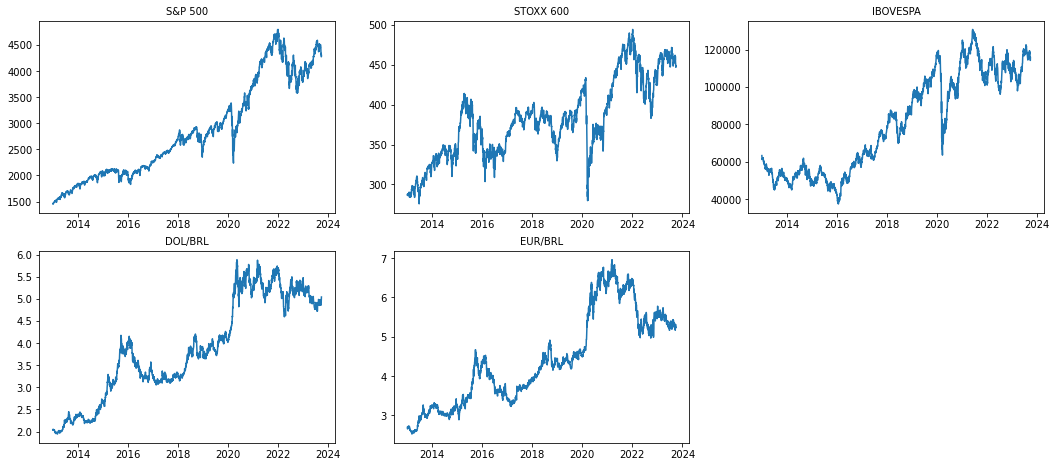

In [105]:
a = dados_snp
b = dados_stox
c = dados_ibov
d = dados_dol
e = dados_eur

plt.figure(figsize = ((18, 12)))

plt.subplot(3, 3, 1)

plt.title("S&P 500", fontsize = 10)
plt.plot(a)

plt.subplot(3, 3, 2)

plt.title("STOXX 600", fontsize = 10)
plt.plot(b)

plt.subplot(3, 3, 3)

plt.title("IBOVESPA", fontsize = 10)
plt.plot(c)

plt.subplot(3, 3, 4)

plt.title("DOL/BRL", fontsize = 10)
plt.plot(d)

plt.subplot(3, 3, 5)

plt.title("EUR/BRL", fontsize = 10)
plt.plot(e)

### 2.3 Colocando todos os ativo na mesma moeda (BRL : R$)

In [106]:
dados_snp['S&P 500'] = dados_snp['S&P 500']*dados_dol['DOL/BRL']
dados_stox['STOXX 600'] = dados_stox['STOXX 600']*dados_eur['EUR/BRL']

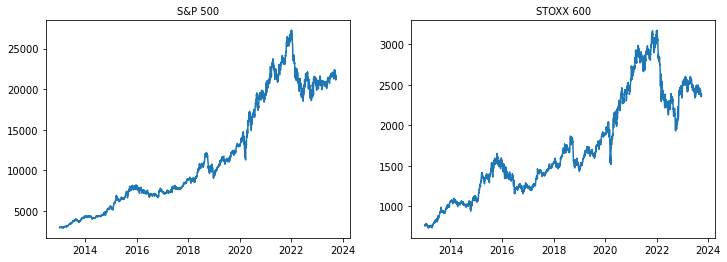

In [107]:
plt.figure(figsize = ((12, 4)))

plt.subplot(1, 2, 1)

plt.title("S&P 500", fontsize = 10)
plt.plot(dados_snp['S&P 500'])

plt.subplot(1, 2, 2)

plt.title("STOXX 600", fontsize = 10)
plt.plot(dados_stox['STOXX 600'])

### 2.4 Juntando os dados no mesmo DataFrame

In [108]:
ativos = pd.concat([dados_snp, dados_stox], axis = 1)
ativos = pd.concat([ativos, dados_ibov], axis = 1).dropna()
ativos. tail()

,S&P 500,STOXX 600,IBOVESPA
Date,,,
2023-09-22,21319.063549,2382.515964,116009.0
2023-09-25,21400.494404,2353.819171,115925.0
2023-09-26,21232.177458,2353.424672,114193.0
2023-09-27,21313.559977,2355.126420,114327.0
2023-09-28,21679.948705,2375.749380,115731.0


In [109]:
ativos.describe()

,S&P 500,STOXX 600,IBOVESPA
count,2540.000000,2540.000000,2540.000000
mean,11963.828827,1730.068866,80864.031102
std,6853.018745,624.093059,26372.977082
min,2929.725385,736.260185,37497.000000
25%,6892.282211,1246.440896,54523.750000
50%,9611.181195,1561.881325,78351.500000
75%,19506.714735,2302.191311,105897.500000
max,27251.664120,3170.126179,130776.000000


## 3. Montando a Carteira

### 3.1 Definindo as quantidades

In [110]:
snp_qtd = 500
stox_qtd = 500
ibov_qtd = 500

quantidades = pd.DataFrame({'S&P 500' : snp_qtd, 'STOXX 600' : stox_qtd, 'IBOVESPA' : ibov_qtd}, index=[0])

quantidades

,S&P 500,STOXX 600,IBOVESPA
0,500,500,500


### 3.2 PL da carteira

In [111]:
PL_carteira = ativos.iloc[-1].dot(quantidades.T)

print(f'O PL da carteira é: R$ {float(PL_carteira):,.2f}')

O PL da carteira é: R$ 69,893,349.04


### 3.3 Calcular a participação dos ativos no PL

In [112]:
snp_part = (ativos['S&P 500'].iloc[-1]*quantidades['S&P 500'].iloc[0])/PL_carteira*100
stoxx_part = (ativos['STOXX 600'].iloc[-1]*quantidades['STOXX 600'].iloc[0])/PL_carteira*100
ibov_part = (ativos['IBOVESPA'].iloc[-1]*quantidades['IBOVESPA'].iloc[0])/PL_carteira*100

print(f'O peso do S&P 500 é: {float(snp_part):,.2f}%')
print(f'O peso do STOXX 600 é: {float(stoxx_part):,.2f}%')
print(f'O peso do IBOVESPA é: {float(ibov_part):,.2f}%')

O peso do S&P 500 é: 15.51%
O peso do STOXX 600 é: 1.70%
O peso do IBOVESPA é: 82.79%


## 4. Calculando o retorno da carteira

### 4.1 calculando a variação diária ponderado pela participação do ativo

In [113]:
retorno = (1+ativos.pct_change()).replace(np.nan,0)

retorno['retornos'] = retorno['S&P 500']*float(snp_part/100) + retorno['STOXX 600']*float(stoxx_part/100) + retorno['IBOVESPA']*float(ibov_part/100)

retorno.tail()

,S&P 500,STOXX 600,IBOVESPA,retornos
Date,,,,
2023-09-22,1.009177,1.008235,0.998829,1.000594
2023-09-25,1.003820,0.987955,0.999276,0.999788
2023-09-26,0.992135,0.999832,0.985059,0.986408
2023-09-27,1.003833,1.000723,1.001173,1.001578
2023-09-28,1.017190,1.008757,1.012281,1.012982


### 4.2 Calculando a cota da carteira

In [114]:
retorno['cota'] = 1
for i in range(1,retorno.shape[0]):
    ret = (retorno['retornos'].iloc[i])*(retorno['cota'].iloc[i-1])
    retorno['cota'].iloc[i] = ret

retorno.tail()

C:\Users\fgomes\AppData\Local\Temp\ipykernel_8204\2552232670.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  retorno['cota'].iloc[i] = ret


,S&P 500,STOXX 600,IBOVESPA,retornos,cota
Date,,,,,
2023-09-22,1.009177,1.008235,0.998829,1.000594,2.416407
2023-09-25,1.003820,0.987955,0.999276,0.999788,2.415895
2023-09-26,0.992135,0.999832,0.985059,0.986408,2.383058
2023-09-27,1.003833,1.000723,1.001173,1.001578,2.386819
2023-09-28,1.017190,1.008757,1.012281,1.012982,2.417805


### 4.3 Calculando o retorno acumulado da carteira

In [115]:
retorno['retorno acumulado'] = 1
for i in range(1,retorno.shape[0]):
    retac = ((retorno['cota'].iloc[i]/retorno['cota'].iloc[0])-1)*100
    retorno['retorno acumulado'].iloc[i] = retac

retorno.tail()

C:\Users\fgomes\AppData\Local\Temp\ipykernel_8204\2748042561.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  retorno['retorno acumulado'].iloc[i] = retac


,S&P 500,STOXX 600,IBOVESPA,retornos,cota,retorno acumulado
Date,,,,,,
2023-09-22,1.009177,1.008235,0.998829,1.000594,2.416407,141.640692
2023-09-25,1.003820,0.987955,0.999276,0.999788,2.415895,141.589516
2023-09-26,0.992135,0.999832,0.985059,0.986408,2.383058,138.305773
2023-09-27,1.003833,1.000723,1.001173,1.001578,2.386819,138.681884
2023-09-28,1.017190,1.008757,1.012281,1.012982,2.417805,141.780490


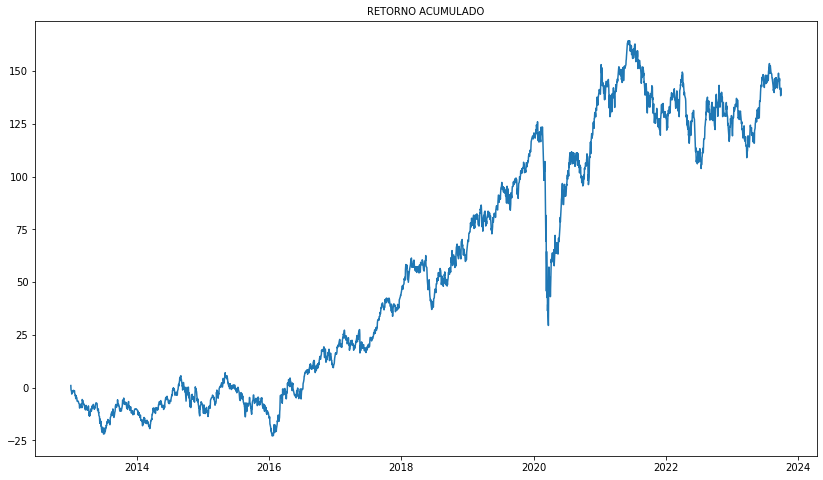

In [116]:
plt.figure(figsize = ((14, 8)))

plt.title("RETORNO ACUMULADO", fontsize = 10)
plt.plot(retorno['retorno acumulado'])